In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
x_org,y_org=iris.data,iris.target
x_select=x_org[:,[0,2]]
print('원래 데이터',x_select.shape,y_org.shape)

원래 데이터 (150, 2) (150,)


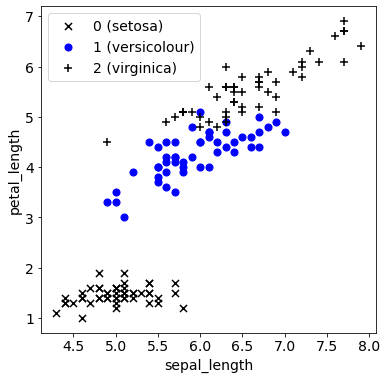

In [4]:
x_t0=x_select[y_org==0]
x_t1=x_select[y_org==1]
x_t2=x_select[y_org==2]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,0],x_t0[:,1],marker='x',c='k',s=50,label='0 (setosa)')
plt.scatter(x_t1[:,0],x_t1[:,1],marker='o',c='b',s=50,label='1 (versicolour)')
plt.scatter(x_t2[:,0],x_t2[:,1],marker='+',c='k',s=50,label='2 (virginica)')
plt.xlabel('sepal_length',fontsize=14)
plt.ylabel('petal_length',fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

In [5]:
x_all=np.insert(x_select,0,1.0,axis=1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False, categories='auto')
y_work=np.c_[y_org]
y_all_one=ohe.fit_transform(y_work)
print('오리지널',y_org.shape)
print('2차원화',y_work.shape)
print('원핫 인코딩',y_all_one.shape)

오리지널 (150,)
2차원화 (150, 1)
원핫 인코딩 (150, 3)


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test,y_train_one,y_test_one=train_test_split(
    x_all,y_org,y_all_one,train_size=75,test_size=75,random_state=123)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,
    y_train_one.shape,y_test_one.shape)

(75, 3) (75, 3) (75,) (75,) (75, 3) (75, 3)


In [10]:
print('입력 데이터(x)')
print(x_train[:5,:])

입력 데이터(x)
[[1.  6.3 4.7]
 [1.  7.  4.7]
 [1.  5.  1.6]
 [1.  6.4 5.6]
 [1.  6.3 5. ]]


In [12]:
print('정답값(y)')
print(y_train[:5])

정답값(y)
[1 1 0 2 2]


In [13]:
print('정답값(원핫 인코딩)')
print(y_train_one[:5,:])

정답값(원핫 인코딩)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [14]:
x,yt=x_train,y_train_one

In [22]:
def softmax(x):
    x=x.T
    x_max=x.max(axis=0)
    x=x-x_max
    w=np.exp(x)
    return (w/w.sum(axis=0)).T

In [23]:
def pred(x,W):
    return softmax(x @ W)

In [24]:
def cross_entropy(yt,yp):
    return -np.mean(np.sum(yt*np.log(yp),axis=1))

In [25]:
from sklearn.metrics import accuracy_score

def evaluate(x_test,y_test,y_test_one,W):
    yp_test_one=pred(x_test,W)
    yp_test=np.argmax(yp_test_one,axis=1)
    loss=cross_entropy(y_test_one,yp_test_one)
    score=accuracy_score(y_test,yp_test)
    return loss,score

In [26]:
M=x.shape[0]
D=x.shape[1]
N=yt.shape[1]

iters=10000
alpha=0.01
W=np.ones((D,N))
history=np.zeros((0,3))

In [27]:
for k in range(iters):
    yp=pred(x,W)
    yd=yp-yt 
    W=W-alpha*(x.T@yd)/M
    
    if(k%10==0):
        loss,score=evaluate(x_test,y_test,y_test_one,W)
        history=np.vstack((history,
            np.array([k,loss,score])))
        print("epoch=%d loss=%f score=%f"
             %(k,loss,score))

epoch=0 loss=1.092628 score=0.266667
epoch=10 loss=1.064035 score=0.266667
epoch=20 loss=1.033466 score=0.266667
epoch=30 loss=1.002645 score=0.266667
epoch=40 loss=0.973510 score=0.266667
epoch=50 loss=0.946309 score=0.386667
epoch=60 loss=0.920978 score=0.560000
epoch=70 loss=0.897402 score=0.600000
epoch=80 loss=0.875452 score=0.613333
epoch=90 loss=0.855005 score=0.626667
epoch=100 loss=0.835942 score=0.626667
epoch=110 loss=0.818152 score=0.626667
epoch=120 loss=0.801532 score=0.626667
epoch=130 loss=0.785986 score=0.626667
epoch=140 loss=0.771424 score=0.640000
epoch=150 loss=0.757767 score=0.653333
epoch=160 loss=0.744941 score=0.680000
epoch=170 loss=0.732877 score=0.706667
epoch=180 loss=0.721513 score=0.760000
epoch=190 loss=0.710795 score=0.786667
epoch=200 loss=0.700670 score=0.786667
epoch=210 loss=0.691092 score=0.800000
epoch=220 loss=0.682018 score=0.800000
epoch=230 loss=0.673411 score=0.813333
epoch=240 loss=0.665236 score=0.813333
epoch=250 loss=0.657459 score=0.8266

epoch=2870 loss=0.312175 score=0.946667
epoch=2880 loss=0.311777 score=0.946667
epoch=2890 loss=0.311382 score=0.946667
epoch=2900 loss=0.310988 score=0.946667
epoch=2910 loss=0.310595 score=0.946667
epoch=2920 loss=0.310204 score=0.946667
epoch=2930 loss=0.309815 score=0.946667
epoch=2940 loss=0.309428 score=0.946667
epoch=2950 loss=0.309042 score=0.946667
epoch=2960 loss=0.308658 score=0.946667
epoch=2970 loss=0.308275 score=0.946667
epoch=2980 loss=0.307894 score=0.946667
epoch=2990 loss=0.307514 score=0.946667
epoch=3000 loss=0.307136 score=0.946667
epoch=3010 loss=0.306760 score=0.946667
epoch=3020 loss=0.306385 score=0.946667
epoch=3030 loss=0.306011 score=0.946667
epoch=3040 loss=0.305639 score=0.946667
epoch=3050 loss=0.305269 score=0.946667
epoch=3060 loss=0.304900 score=0.946667
epoch=3070 loss=0.304533 score=0.946667
epoch=3080 loss=0.304167 score=0.946667
epoch=3090 loss=0.303803 score=0.946667
epoch=3100 loss=0.303440 score=0.946667
epoch=3110 loss=0.303078 score=0.946667


epoch=5850 loss=0.239096 score=0.960000
epoch=5860 loss=0.238945 score=0.960000
epoch=5870 loss=0.238794 score=0.960000
epoch=5880 loss=0.238644 score=0.960000
epoch=5890 loss=0.238493 score=0.960000
epoch=5900 loss=0.238344 score=0.960000
epoch=5910 loss=0.238194 score=0.960000
epoch=5920 loss=0.238045 score=0.960000
epoch=5930 loss=0.237897 score=0.960000
epoch=5940 loss=0.237749 score=0.960000
epoch=5950 loss=0.237601 score=0.960000
epoch=5960 loss=0.237453 score=0.960000
epoch=5970 loss=0.237306 score=0.960000
epoch=5980 loss=0.237160 score=0.960000
epoch=5990 loss=0.237013 score=0.960000
epoch=6000 loss=0.236867 score=0.960000
epoch=6010 loss=0.236722 score=0.960000
epoch=6020 loss=0.236576 score=0.960000
epoch=6030 loss=0.236431 score=0.960000
epoch=6040 loss=0.236287 score=0.960000
epoch=6050 loss=0.236143 score=0.960000
epoch=6060 loss=0.235999 score=0.960000
epoch=6070 loss=0.235855 score=0.960000
epoch=6080 loss=0.235712 score=0.960000
epoch=6090 loss=0.235570 score=0.960000


epoch=8460 loss=0.209409 score=0.960000
epoch=8470 loss=0.209323 score=0.960000
epoch=8480 loss=0.209238 score=0.960000
epoch=8490 loss=0.209153 score=0.960000
epoch=8500 loss=0.209067 score=0.960000
epoch=8510 loss=0.208983 score=0.960000
epoch=8520 loss=0.208898 score=0.960000
epoch=8530 loss=0.208813 score=0.960000
epoch=8540 loss=0.208729 score=0.960000
epoch=8550 loss=0.208645 score=0.960000
epoch=8560 loss=0.208560 score=0.960000
epoch=8570 loss=0.208477 score=0.960000
epoch=8580 loss=0.208393 score=0.960000
epoch=8590 loss=0.208309 score=0.960000
epoch=8600 loss=0.208226 score=0.960000
epoch=8610 loss=0.208142 score=0.960000
epoch=8620 loss=0.208059 score=0.960000
epoch=8630 loss=0.207976 score=0.960000
epoch=8640 loss=0.207893 score=0.960000
epoch=8650 loss=0.207811 score=0.960000
epoch=8660 loss=0.207728 score=0.960000
epoch=8670 loss=0.207646 score=0.960000
epoch=8680 loss=0.207563 score=0.960000
epoch=8690 loss=0.207481 score=0.960000
epoch=8700 loss=0.207399 score=0.960000


In [28]:
print('[초기 상태] 손실함수:%f, 정확도:%f'
     %(history[0,1],history[0,2]))
print('[최종 상태] 손실함수:%f, 정확도:%f'
     %(history[-1,1],history[-1,2]))

[초기 상태] 손실함수:1.092628, 정확도:0.266667
[최종 상태] 손실함수:0.197948, 정확도:0.960000


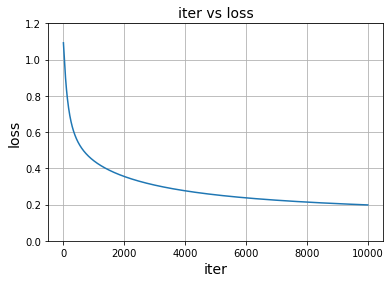

In [29]:
plt.plot(history[:,0],history[:,1])
plt.grid()
plt.ylim(0,1.2)
plt.xlabel('iter',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('iter vs loss',fontsize=14)
plt.show()

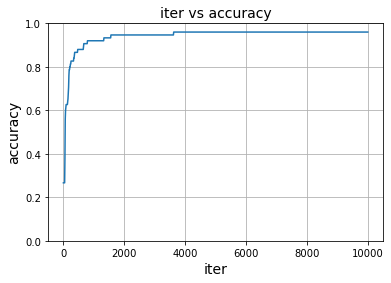

In [31]:
plt.plot(history[:,0],history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('iter vs accuracy',fontsize=14)
plt.show()

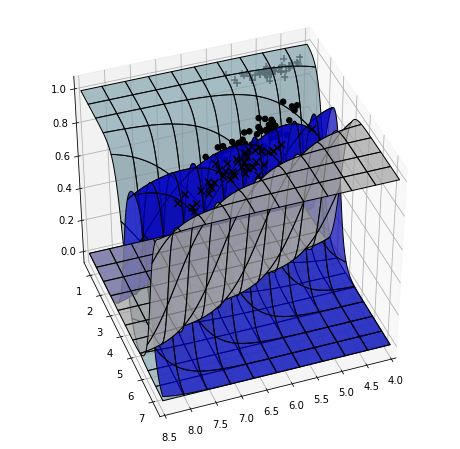

In [35]:
from mpl_toolkits.mplot3d import Axes3D
x1=np.linspace(4,8.5,100)
x2=np.linspace(0.5,7.5,100)
xx1,xx2=np.meshgrid(x1,x2)
xxx=np.array([np.ones(xx1.ravel().shape),
        xx1.ravel(),xx2.ravel()]).T
pp=pred(xxx,W)
c0=pp[:,0].reshape(xx1.shape)
c1=pp[:,1].reshape(xx1.shape)
c2=pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax=plt.subplot(1,1,1,projection='3d')
ax.plot_surface(xx1,xx2,c0,color='lightblue',
        edgecolor='black',rstride=10,cstride=10,alpha=0.7)
ax.plot_surface(xx1,xx2,c1,color='blue',
        edgecolor='black',rstride=10,cstride=10,alpha=0.7)
ax.plot_surface(xx1,xx2,c2,color='lightgrey',
        edgecolor='black',rstride=10,cstride=10,alpha=0.7)
ax.scatter(x_t0[:,0],x_t0[:,1],1,s=50,alpha=1,marker='+',c='k')
ax.scatter(x_t1[:,0],x_t1[:,1],1,s=30,alpha=1,marker='o',c='k')
ax.scatter(x_t2[:,0],x_t2[:,1],1,s=50,alpha=1,marker='x',c='k')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40,azim=70)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

yp_test_one=pred(x_test,W)
yp_test=np.argmax(yp_test_one,axis=1)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,yp_test)
print('accuract:%f'%score)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))

accuract:0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75



In [37]:
x_all2=np.insert(x_org,0,1.0,axis=1)

In [40]:
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train,y_test,\
y_train_one,y_test_one=train_test_split(
    x_all2,y_org,y_all_one, train_size=75,
    test_size=75,random_state=123)
print(x_train2.shape,x_test2.shape,
     y_train.shape,y_test.shape,
     y_train_one.shape,y_test_one.shape)

(75, 5) (75, 5) (75,) (75,) (75, 3) (75, 3)


In [41]:
print('입력 데이터(x)')
print(x_train2[:5,:])

입력 데이터(x)
[[1.  6.3 3.3 4.7 1.6]
 [1.  7.  3.2 4.7 1.4]
 [1.  5.  3.  1.6 0.2]
 [1.  6.4 2.8 5.6 2.1]
 [1.  6.3 2.5 5.  1.9]]


In [43]:
x,yt,x_test=x_train2,y_train_one,x_test2

In [63]:
M=x.shape[0]
D=x.shape[1]
N=yt.shape[1]
iters=10000
alpha=0.01
W=np.ones((D,N))
history=np.zeros((0,3))

In [64]:
for k in range(iters):
    yp=pred(x,W)
    yd=yp-yt
    W=W-alpha*(x.T@yd)/M
    if(k%10==0):
        loss,score=evaluate(x_test,y_test,y_test_one,W)
        history=np.vstack((history, np.array([k,loss,score])))
        print("epoch=%d loss =%f score=%f"%(k,loss,score))

epoch=0 loss =1.091583 score=0.266667
epoch=10 loss =1.041711 score=0.266667
epoch=20 loss =0.988501 score=0.266667
epoch=30 loss =0.939962 score=0.573333
epoch=40 loss =0.897037 score=0.626667
epoch=50 loss =0.859177 score=0.626667
epoch=60 loss =0.825724 score=0.626667
epoch=70 loss =0.796070 score=0.626667
epoch=80 loss =0.769683 score=0.653333
epoch=90 loss =0.746103 score=0.653333
epoch=100 loss =0.724936 score=0.693333
epoch=110 loss =0.705850 score=0.746667
epoch=120 loss =0.688561 score=0.760000
epoch=130 loss =0.672832 score=0.760000
epoch=140 loss =0.658461 score=0.786667
epoch=150 loss =0.645275 score=0.786667
epoch=160 loss =0.633131 score=0.786667
epoch=170 loss =0.621903 score=0.813333
epoch=180 loss =0.611485 score=0.813333
epoch=190 loss =0.601788 score=0.840000
epoch=200 loss =0.592731 score=0.840000
epoch=210 loss =0.584248 score=0.880000
epoch=220 loss =0.576280 score=0.880000
epoch=230 loss =0.568774 score=0.893333
epoch=240 loss =0.561688 score=0.906667
epoch=250 l

epoch=2790 loss =0.234765 score=0.960000
epoch=2800 loss =0.234383 score=0.960000
epoch=2810 loss =0.234003 score=0.960000
epoch=2820 loss =0.233625 score=0.960000
epoch=2830 loss =0.233249 score=0.960000
epoch=2840 loss =0.232875 score=0.960000
epoch=2850 loss =0.232502 score=0.960000
epoch=2860 loss =0.232132 score=0.960000
epoch=2870 loss =0.231763 score=0.960000
epoch=2880 loss =0.231397 score=0.960000
epoch=2890 loss =0.231032 score=0.960000
epoch=2900 loss =0.230668 score=0.960000
epoch=2910 loss =0.230307 score=0.960000
epoch=2920 loss =0.229947 score=0.960000
epoch=2930 loss =0.229589 score=0.960000
epoch=2940 loss =0.229233 score=0.960000
epoch=2950 loss =0.228879 score=0.960000
epoch=2960 loss =0.228526 score=0.960000
epoch=2970 loss =0.228175 score=0.960000
epoch=2980 loss =0.227826 score=0.960000
epoch=2990 loss =0.227478 score=0.960000
epoch=3000 loss =0.227132 score=0.960000
epoch=3010 loss =0.226788 score=0.960000
epoch=3020 loss =0.226445 score=0.960000
epoch=3030 loss 

epoch=6710 loss =0.159491 score=0.960000
epoch=6720 loss =0.159395 score=0.960000
epoch=6730 loss =0.159299 score=0.960000
epoch=6740 loss =0.159203 score=0.960000
epoch=6750 loss =0.159108 score=0.960000
epoch=6760 loss =0.159013 score=0.960000
epoch=6770 loss =0.158918 score=0.960000
epoch=6780 loss =0.158823 score=0.960000
epoch=6790 loss =0.158729 score=0.960000
epoch=6800 loss =0.158634 score=0.960000
epoch=6810 loss =0.158541 score=0.960000
epoch=6820 loss =0.158447 score=0.960000
epoch=6830 loss =0.158353 score=0.960000
epoch=6840 loss =0.158260 score=0.960000
epoch=6850 loss =0.158167 score=0.960000
epoch=6860 loss =0.158074 score=0.960000
epoch=6870 loss =0.157982 score=0.960000
epoch=6880 loss =0.157890 score=0.960000
epoch=6890 loss =0.157797 score=0.960000
epoch=6900 loss =0.157706 score=0.960000
epoch=6910 loss =0.157614 score=0.960000
epoch=6920 loss =0.157523 score=0.960000
epoch=6930 loss =0.157431 score=0.960000
epoch=6940 loss =0.157341 score=0.960000
epoch=6950 loss 

epoch=9580 loss =0.139271 score=0.960000
epoch=9590 loss =0.139219 score=0.960000
epoch=9600 loss =0.139168 score=0.960000
epoch=9610 loss =0.139117 score=0.960000
epoch=9620 loss =0.139065 score=0.960000
epoch=9630 loss =0.139014 score=0.960000
epoch=9640 loss =0.138963 score=0.960000
epoch=9650 loss =0.138912 score=0.960000
epoch=9660 loss =0.138861 score=0.960000
epoch=9670 loss =0.138811 score=0.960000
epoch=9680 loss =0.138760 score=0.960000
epoch=9690 loss =0.138709 score=0.960000
epoch=9700 loss =0.138659 score=0.960000
epoch=9710 loss =0.138609 score=0.960000
epoch=9720 loss =0.138558 score=0.960000
epoch=9730 loss =0.138508 score=0.960000
epoch=9740 loss =0.138458 score=0.960000
epoch=9750 loss =0.138408 score=0.960000
epoch=9760 loss =0.138358 score=0.960000
epoch=9770 loss =0.138308 score=0.960000
epoch=9780 loss =0.138258 score=0.960000
epoch=9790 loss =0.138209 score=0.960000
epoch=9800 loss =0.138159 score=0.960000
epoch=9810 loss =0.138110 score=0.960000
epoch=9820 loss 

In [65]:
print(history.shape)

(1000, 3)


In [66]:
print('[초기 상태]손실함수:%f, 정확도:%f' 
      %(history[0,1],history[0,2]))
print('[최종 상태]손실함수:%f, 정확도:%f' 
      %(history[-1,1],history[-1,2]))

[초기 상태]손실함수:1.091583, 정확도:0.266667
[최종 상태]손실함수:0.137235, 정확도:0.960000


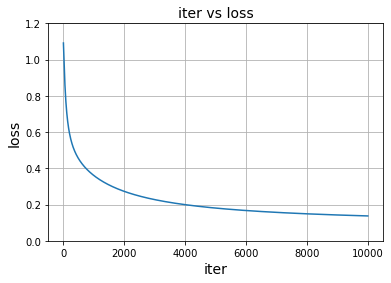

In [67]:
plt.plot(history[:,0],history[:,1])
plt.ylim(0,1.2)
plt.grid()
plt.xlabel('iter',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

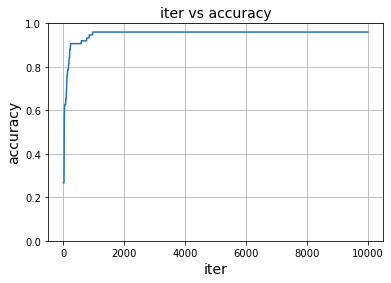

In [68]:
plt.plot(history[:,0],history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('iter vs accuracy',fontsize=14)
plt.show()